In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('up_spam.csv')

In [3]:
df.head()

,Unnamed: 0,target,text
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729 entries, 0 to 5728
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5729 non-null   int64 
 1   target      5729 non-null   object
 2   text        5729 non-null   object
dtypes: int64(1), object(2)
memory usage: 134.4+ KB


In [5]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [7]:
df['target']=encoder.fit_transform(df['target'])

In [8]:
#check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [9]:
#check for duplicate values
df.duplicated().sum()

489

In [10]:
#remove duplicate values
df=df.drop_duplicates(keep='first')

In [11]:
df.duplicated().sum()

0

EDA

In [12]:
df['target'].value_counts()

target
0    4516
1     724
Name: count, dtype: int64

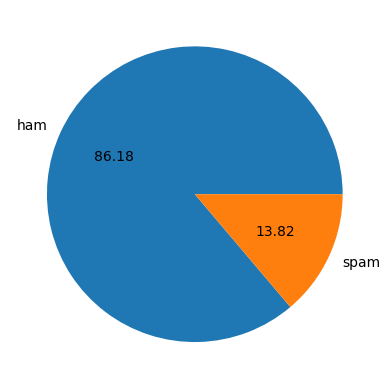

In [13]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [14]:
#Data is imbalanced
import nltk

In [15]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [16]:
df['num_characters']= df['text'].apply(len)

In [17]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
#number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [19]:
#number of sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [20]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5240.000000,5240.000000,5240.000000
mean,78.943702,18.393321,1.957824
std,57.848035,13.246747,1.441331
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.500000,15.000000,1.000000
75%,115.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5240.000000,5240.000000,5240.000000,5240.000000
mean,0.138168,78.943702,18.393321,1.957824
std,0.345109,57.848035,13.246747,1.441331
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.500000,15.000000,1.000000
75%,0.000000,115.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [23]:
df.isnull().sum()
print(df.shape)

(5240, 5)


In [24]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,724.000000,724.000000,724.000000
mean,131.866022,26.312155,2.816298
std,34.048213,7.846862,1.497147
min,13.000000,2.000000,1.000000
25%,114.750000,22.000000,2.000000
50%,146.000000,28.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [26]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

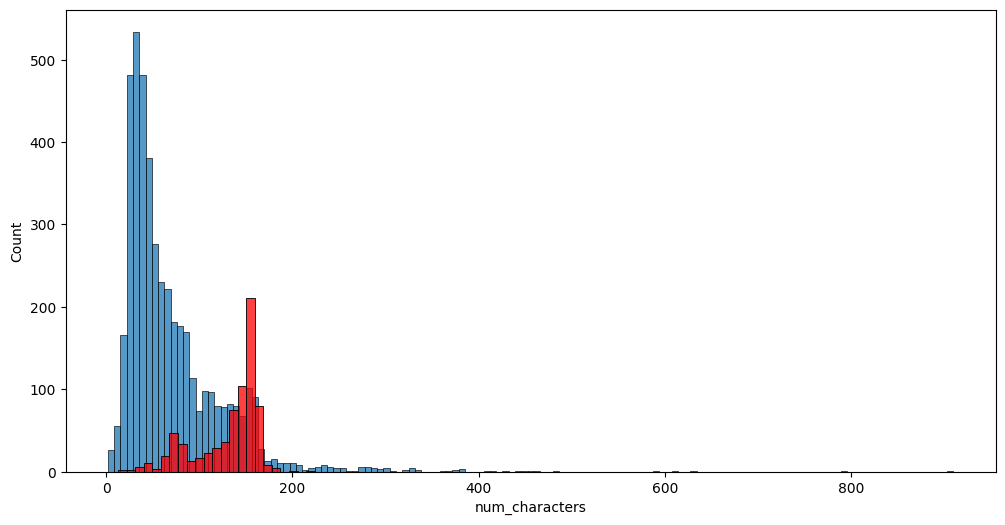

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

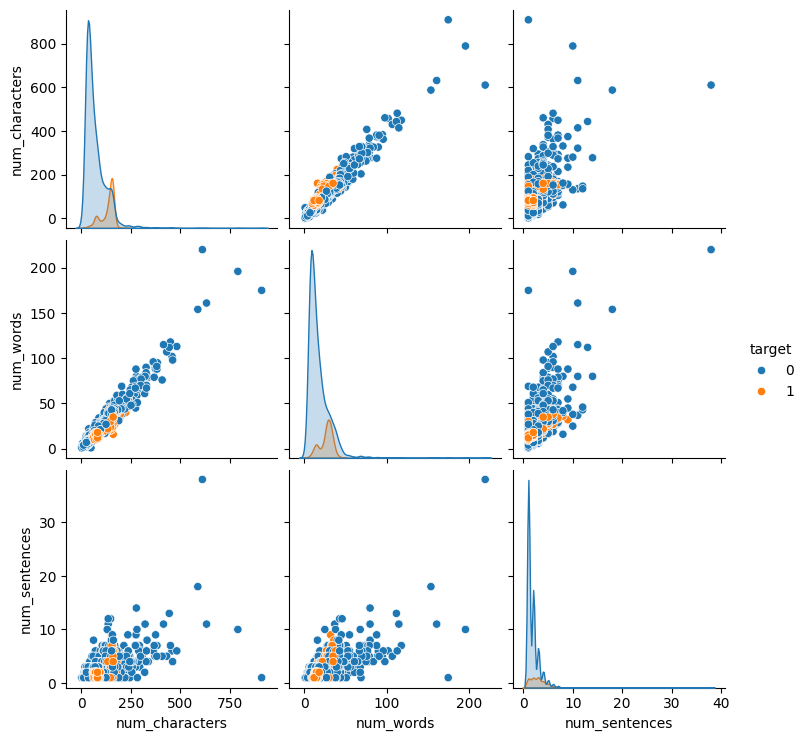

In [28]:
sns.pairplot(df,hue='target')

In [29]:
df[['target','num_characters','num_words','num_sentences']].corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.366340,0.239379,0.238505
num_characters,0.366340,1.000000,0.964993,0.623016
num_words,0.239379,0.964993,1.000000,0.680309
num_sentences,0.238505,0.623016,0.680309,1.000000


<Axes: >

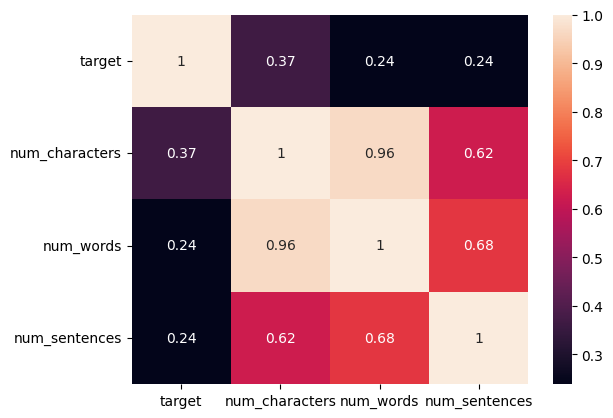

In [30]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)
#its says that num_character is best for independent varibale as it is highly correlated with target of 0.38> 0.26

#3. Data Preprocessing
#-lower case
#-tokenization
#-remove special character
#-remove stop words and punctuation
#-stemming(convetring grammar (dancing->dance))

In [31]:
nltk.download('stopwords')
nltk.download('PorterStemmer')
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading PorterStemmer: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [32]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i  not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [33]:
transform_text("HI HOW ARE &YOU kamlesh i will kick your a$$?")

'hi kamlesh kick'

In [34]:
df['transformed_text']=df['text'].apply(transform_text)

In [35]:
df.head(10)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


In [36]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [82]:
spam_wc= wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=""))

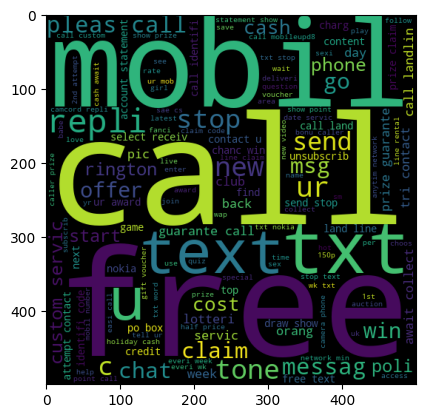

In [83]:
plt.imshow(spam_wc)

In [38]:
ham_wc= wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=""))

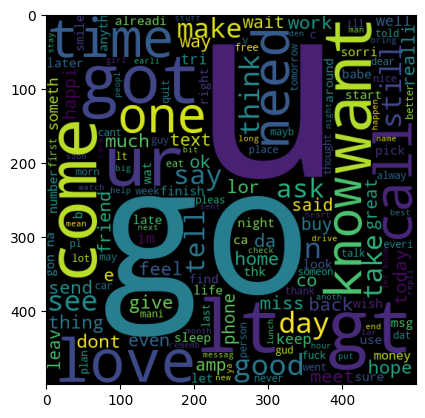

In [40]:
plt.imshow(ham_wc)

In [41]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [42]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [43]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [44]:
len(spam_corpus)

10454

In [45]:
len(ham_corpus)

35404

In [46]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

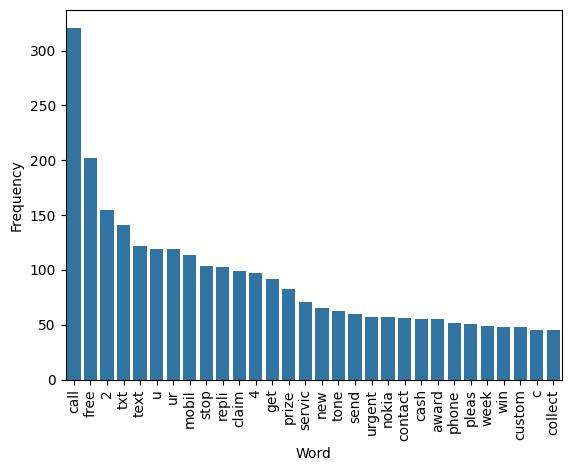

In [47]:
from collections import Counter
sc=pd.DataFrame(Counter(spam_corpus).most_common(30))
sc.rename(columns={0:'Word',1:'Frequency'},inplace=True)
sns.barplot(x='Word', y='Frequency', data=sc)
plt.xticks(rotation='vertical')
plt.show()
#sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

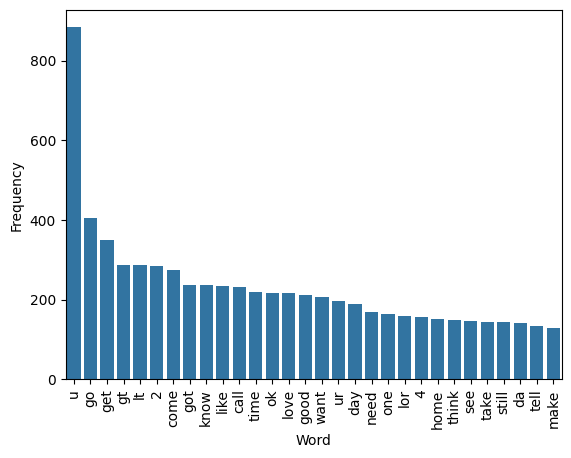

In [48]:
from collections import Counter
hc=pd.DataFrame(Counter(ham_corpus).most_common(30))
hc.rename(columns={0:'Word',1:'Frequency'},inplace=True)
sns.barplot(x='Word', y='Frequency', data=hc)
plt.xticks(rotation='vertical')
plt.show()

4.Model Building

In [49]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [50]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [51]:
X.shape

(5240, 3000)

In [52]:
y=df['target'].values

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [55]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [56]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [57]:
#gaussian naive bayes
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8473282442748091
[[757 133]
 [ 27 131]]
0.4962121212121212


In [58]:
#multinomial naive bayes
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9666030534351145
[[889   1]
 [ 34 124]]
0.992


In [59]:
#bernouli naive bayes
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9770992366412213
[[886   4]
 [ 20 138]]
0.971830985915493


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [61]:
knc = KNeighborsClassifier()
mnb = MultinomialNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [62]:
clfs = {
    'KN' : knc,
    'NB': mnb,
    'LR': lrc,
    'RF': rfc
}

In [63]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [64]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  KN
Accuracy -  0.8883587786259542
Precision -  1.0
For  NB
Accuracy -  0.9666030534351145
Precision -  0.992
For  LR
Accuracy -  0.9427480916030534
Precision -  0.9537037037037037
For  RF
Accuracy -  0.9627862595419847
Precision -  0.976


In [65]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [66]:
performance_df

,Algorithm,Accuracy,Precision
0,KN,0.888359,1.000000
1,NB,0.966603,0.992000
3,RF,0.962786,0.976000
2,LR,0.942748,0.953704


In [67]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [68]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.888359
1,NB,Accuracy,0.966603
2,RF,Accuracy,0.962786
3,LR,Accuracy,0.942748
4,KN,Precision,1.000000
5,NB,Precision,0.992000
6,RF,Precision,0.976000
7,LR,Precision,0.953704


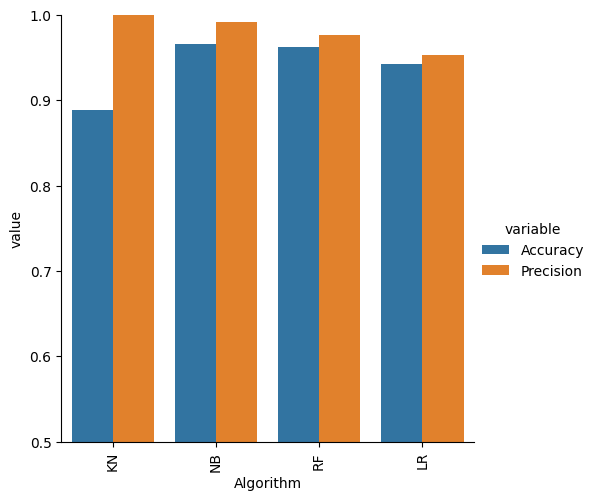

In [69]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [77]:
from sklearn.metrics import confusion_matrix

In [79]:
cm=confusion_matrix(y_test,y_pred2)

In [80]:
print(cm)

[[889   1]
 [ 34 124]]


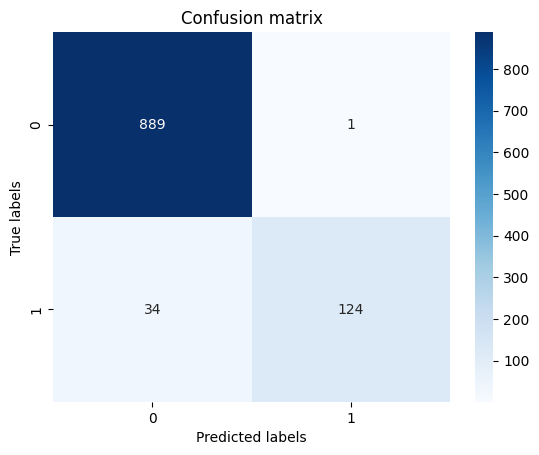

In [81]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

In [70]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [71]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [72]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [73]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [74]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [75]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.888359,1.000000,0.888359,1.000000,0.888359,1.000000,0.888359,1.000000
1,NB,0.966603,0.992000,0.966603,0.992000,0.966603,0.992000,0.966603,0.992000
2,RF,0.962786,0.976000,0.962786,0.976000,0.962786,0.976000,0.962786,0.976000
3,LR,0.942748,0.953704,0.942748,0.953704,0.942748,0.953704,0.942748,0.953704


In [76]:
import pickle
pickle.dump(tfidf,open('vectorizer_f.pkl','wb'))
pickle.dump(mnb,open('model_f.pkl','wb'))